Before running the file Upload all your data set on your goole drive in a zip format

In [55]:
#Mount our google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#To get the average frame count
import json
import glob
import numpy as np
import cv2
import copy
#change the path accordingly
video_files =  glob.glob('/content/drive/MyDrive/Celeb-DF/Celeb-DF/Celeb-real/id0_0000.mp4')
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<150):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames" , frame_count)
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames [469]
Total number of videos:  1
Average frame per video: 469.0


In [57]:
!pip3 install face_recognition

In [58]:
# to extract frame
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image
#!pip3 install face_recognition
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
from tqdm.autonotebook import tqdm
from google.colab.patches import cv2_imshow
# process the frames
def create_face_videos(path_list,out_dir):
  already_present_count =  glob.glob(out_dir+'.mp4')
  print("No of videos already present " , len(already_present_count))
  for path in tqdm(path_list):
    out_path = os.path.join(out_dir,path.split('/')[-1])
    file_exists = glob.glob(out_path)
    if(len(file_exists) != 0):
      print("File Already exists: " , out_path)
      continue
    frames = []
    flag = 0
    face_all = []
    frames1 = []
    out = cv2.VideoWriter(out_path,cv2.VideoWriter_fourcc('M','J','P','G'), 30, (112,112))
    for idx,frame in enumerate(frame_extract(path)):
      if idx == 0:
        cv2_imshow(frame)
      #if(idx % 3 == 0):
      if(idx <= 150):
        frames.append(frame)
        if(len(frames) == 4):
          faces = face_recognition.batch_face_locations(frames)
          for i,face in enumerate(faces):
            if(len(face) != 0):
              top,right,bottom,left = face[0]
            try:
              out.write(cv2.resize(frames[i][top:bottom,left:right,:],(112,112)))
              if i == 0:
                cv2_imshow(cv2.resize(frames[i][top:bottom,left:right,:],(112,112)))
            except:
              pass
          frames = []
    try:
      del top,right,bottom,left
    except:
      pass
    out.release()

No of videos already present  0


  0%|          | 0/1 [00:00<?, ?it/s]

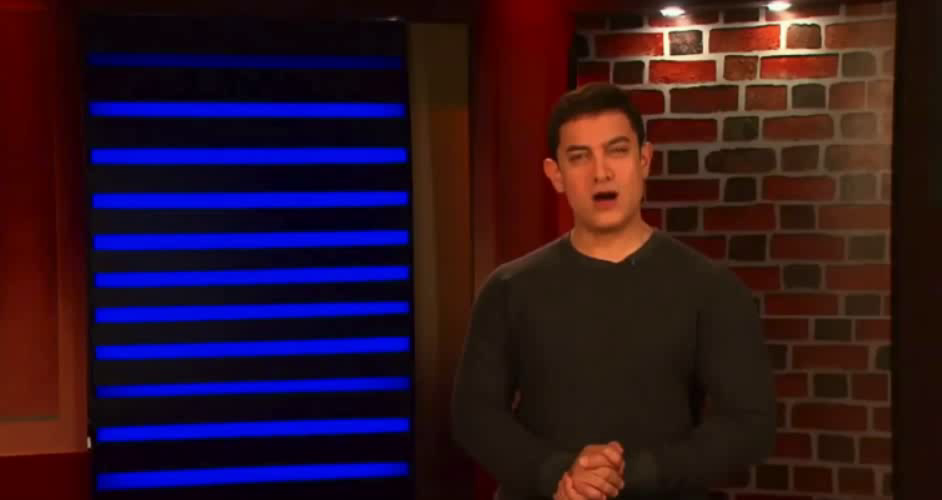

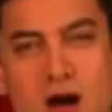

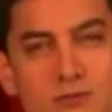

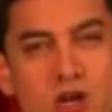

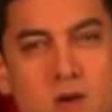

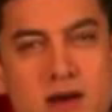

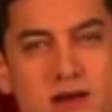

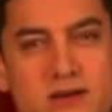

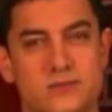

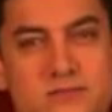

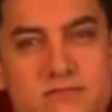

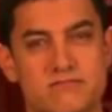

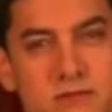

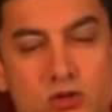

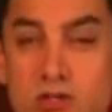

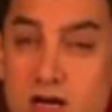

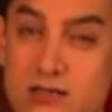

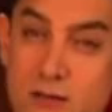

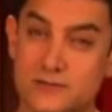

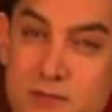

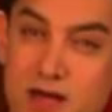

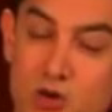

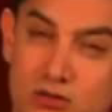

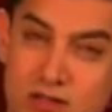

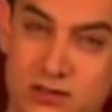

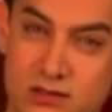

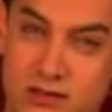

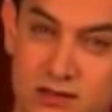

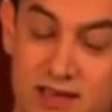

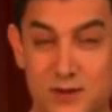

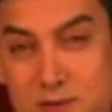

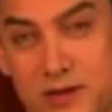

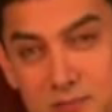

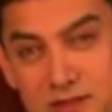

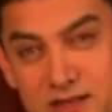

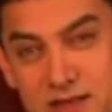

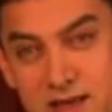

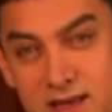

In [59]:
!mkdir '/content/drive/MyDrive/Celeb_Real_Face_Only'
create_face_videos(video_files,'/content/drive/MyDrive/Celeb_Real_Face_Only/')

In [60]:
#To get the average frame count
import json
import glob
import numpy as np
import cv2
import copy
#change the path accordingly
video_files =  glob.glob('/content/drive/MyDrive/Celeb-DF/Celeb-DF/Celeb-synthesis/id0_id16_0000.mp4')
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<150):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames" , frame_count)
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames [469]
Total number of videos:  1
Average frame per video: 469.0


No of videos already present  0


  0%|          | 0/1 [00:00<?, ?it/s]

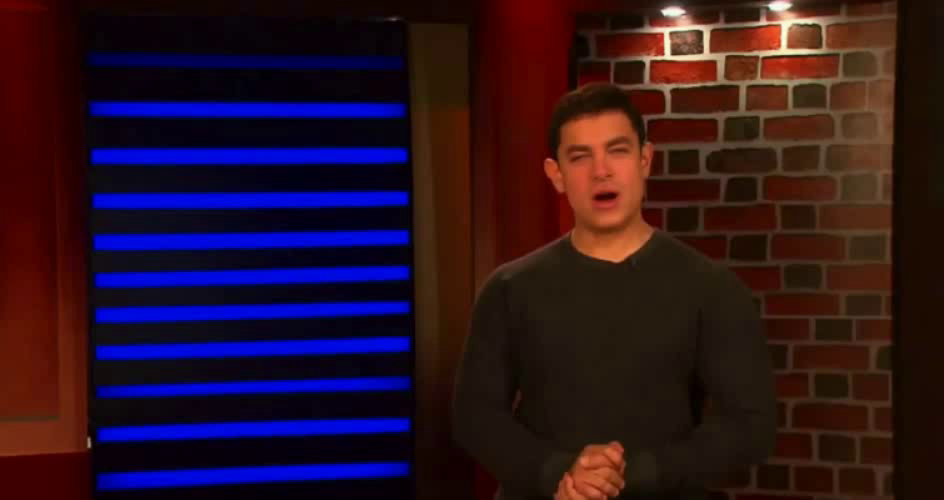

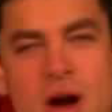

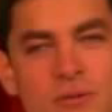

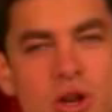

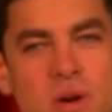

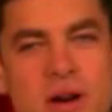

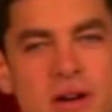

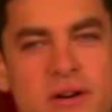

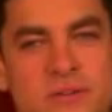

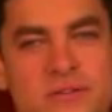

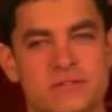

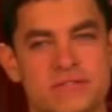

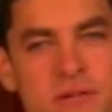

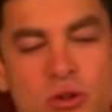

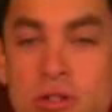

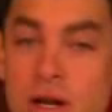

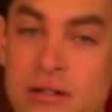

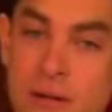

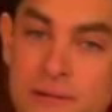

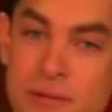

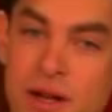

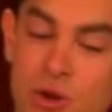

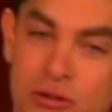

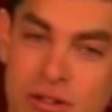

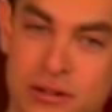

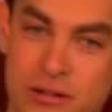

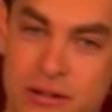

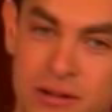

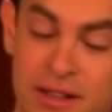

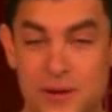

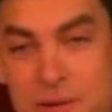

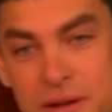

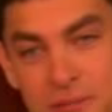

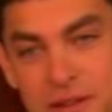

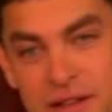

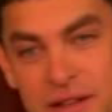

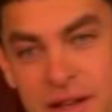

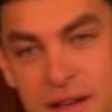

In [61]:
!mkdir '/content/drive/MyDrive/Celeb_Fake_Face_Only'
create_face_videos(video_files,'/content/drive/MyDrive/Celeb_Fake_Face_Only/')